# Normal Distribution

Let's investigate how shape of the normal distribution curve look likes.

In [1]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from IPython.display import display

Draw the normal distribution curve for a given mean and standard deviation value.

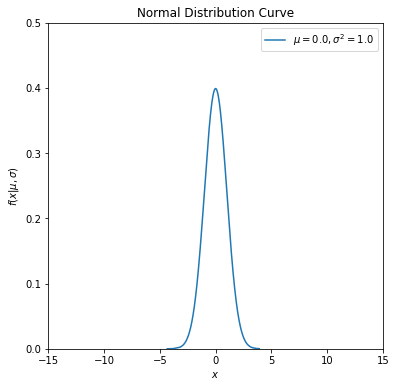

In [2]:
#assume mean (mu) = 0 and sd (sigma) = 1.
#you can change the values as you wish

mu = 0
sigma = 1

fig, ax = plt.subplots(figsize = (6, 6))

#norm.rvs generates random normal dist. variables according
#to given loc and scale, where loc is the mean and scale is the sd.
#assume mean (loc) = 0 and sigma (scale) = 1.

x = stats.norm.rvs(loc = mu, scale = sigma, size = 10000)
x1 = np.sort(x)

#norm.pdf calculates the corresponding pdf values of x1
#i sorted x values otherwise plt.plot cannot produce a proper plot.
#replace x1 with x in the following command, and you will see that what i mean.

#data values are on the x-axis, their corresponding pdf values are on the y-axis.
#connectiong (x,y) values gives us the pdf of normal distribution for the specified
#mean (loc) and sigma (scale).

plt.plot(x1, stats.norm.pdf(x1, loc = mu, scale = sigma), 
         label = r'$\mu=%.1f,\sigma^2=%.1f$' % (mu, sigma*sigma))  #string formatting
        
plt.xlim(-15, 15)
plt.ylim(0, 0.5)
plt.xlabel('$x$')
plt.ylabel('$f(x|\mu,\sigma)$')
plt.title('Normal Distribution Curve')
plt.legend(loc='upper right')
plt.show()

Let's now investigate how shape of the normal distribution curve changes with respect to mean ($\mu$) and standard deviation ($\sigma$) parameters. We will define a function first to simplify our calculations.

In [6]:
# define a Python function with four parameters

def normal_dist_curve(mu, sigma, ltype, col):
    
    fig, ax = plt.subplots(figsize = (6, 6))
    
    #use zip for parallel iteration
    for m, s, l, cl in zip(mu, sigma, ltype, col):
        #generate 10000 random variables for given mean and sd
        x = stats.norm.rvs(loc = m, scale = s, size = 10000)
        x1 = np.sort(x)
        plt.plot(x1, stats.norm.pdf(x1, loc = m, scale = s), 
                 ls = l, c = cl, label = r'$\mu=%.1f  , \sigma^2=%.1f$' % (m, s*s))  
        
    plt.xlim(-15, 15)
    plt.ylim(0, 0.5)
    plt.xlabel('$x$')
    plt.ylabel('$f(x|\mu,\sigma^2)$')
    plt.title('Normal Distribution Curve')
    plt.legend(loc='upper right')
    plt.show()

Now play with the function to see the changes on the normal distribution curve.

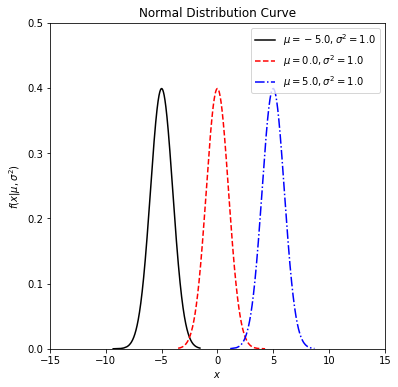

None

In [8]:
## change the following values as you wish
## define the input arguments (values of the parameters)
mu_values = [-5, 0, 5]
#fix sigma at 1
sigma_values = [1, 1, 1]
linestyles = ['-', '--', '-.']
colors = ['black', 'red', 'blue']

normal_curve = normal_dist_curve(mu = mu_values, sigma = sigma_values, ltype = linestyles, col = colors)

display(normal_curve)

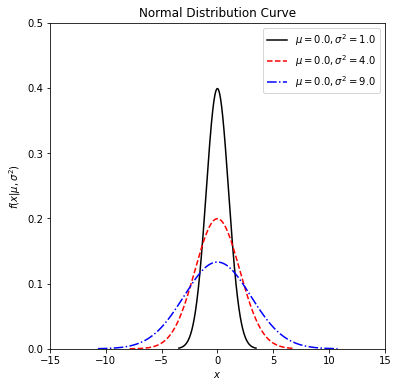

None

In [9]:
## change the following values as you wish
## define the input arguments (values of the parameters)
#fix mu at 0
mu_values = [0, 0, 0]
sigma_values = [1, 2, 3]
linestyles = ['-', '--', '-.']
colors = ['black', 'red', 'blue']

normal_curve = normal_dist_curve(mu = mu_values, sigma = sigma_values, ltype = linestyles, col = colors)

display(normal_curve)

# Cumulative distribution function 

Let's say, now, we would like to calculate $Pr(X \leq a)$, where X is a normal variable and a is pre-defined value. For example, given the mean of 5 and the standard deviation of 2, calculate the probability of 𝑃(𝑋<4).

In [10]:
import scipy.stats as stats
cum_prob = stats.norm.cdf(x = 4, loc = 5, scale = 2)
print("%.4f"%cum_prob)

0.3085


Calculate the probability of 𝑃(𝑋<0), given that $X \sim N(0,1)$.

In [11]:
import scipy.stats as stats
cum_prob = stats.norm.cdf(x = 0, loc = 0, scale = 1)
print("%.4f"%cum_prob)

0.5000


Let's use **fill_between()** command from matplotlib to shade the area defined by 𝑃(𝑋<0) under the pdf of $X \sim N(0,1)$. 

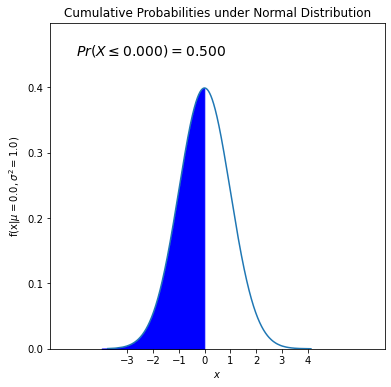

In [12]:
# this code is similar to second code chunk where
# some input arguments are a bit automatized

# define mu, sd and cutoff value (lessthan)

mu = 0
sd = 1
upper_bound = 0

#calculate the cumulative probability under given distribution
cum_prob = stats.norm.cdf(x = upper_bound, loc = mu, scale = sd)

#start off plotting 
fig, ax = plt.subplots(figsize = (6, 6))

# for pdf curve
#generate synthetic data to plot the pdf
x = stats.norm.rvs(loc = mu, scale = sd, size = 10000)
x1 = np.sort(x)

plt.plot(x1, stats.norm.pdf(x1, loc = mu, scale = sd), 
         label = r'$\mu=%.1f,\sigma^2=%.1f$' % (mu, sd*sd))

# arrange x-axis limits based on the min and max values in the data
plt.xlim(int(np.min(x1))-3, int(np.max(x1))+3)
#instead of default tickmarks, define yours.
plt.xticks(np.arange(int(np.min(x1)), int(np.max(x1))+1, 1))
# arrange upper limit of y-axis max values in the pdf values (y's min value is always 0).
plt.ylim(0, np.max(stats.norm.pdf(x1, loc = mu, scale = sd))+0.1)
plt.xlabel('$x$')
plt.ylabel('f(x|$\mu=%.1f,\sigma^2=%.1f$)' % (mu, sd*sd))
plt.title('Cumulative Probabilities under Normal Distribution')


#for shading area defined by the cumulative probability

#specifically generate values between int(np.min(x1)) and upper_bound with increments 0.01
#with np.arange(), data comes alread sorted (it creates an increasing series).
x2 = np.arange(int(np.min(x1))-1,upper_bound,0.01)

#go to https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html for more info
plt.fill_between(x2,stats.norm.pdf(x2, loc = mu, scale = sd), color='blue')
        
#add a text, where x coordinate is -4.5 and y-coordinate is based on the peak point of the curve.

plt.text(int(np.min(x1))-2,np.max(stats.norm.pdf(x1, loc = mu, scale = sd))+0.05,
         "$Pr(X \leq %.3f)=%.3f$" % (upper_bound, cum_prob), fontsize=14)

plt.show()

# Probability of falling into an interval

We can also calculate probability of falling between a and b values for a normal variable X such that Pr(a < X < b). Let's find 𝑃(-1.96<𝑋<1.96) with a mean of 0 and a standard deviation of 1. We need to subtract one cdf from another cdf.

In [13]:
import scipy.stats as stats
interval_prob = stats.norm.cdf(x = 1.96, loc = 0, scale = 1) - stats.norm.cdf(x = -1.96, loc = 0, scale = 1)
print("%.4f"%interval_prob)

0.9500


As in the previous case, let's visualize it.

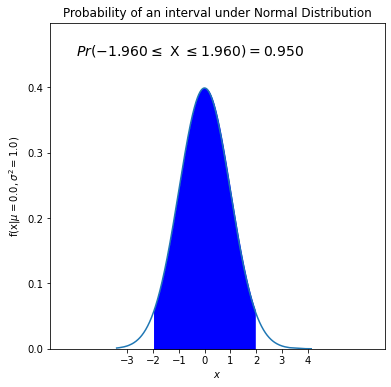

In [14]:
# this code is similar to second code chunk where
# some input arguments are a bit automatized

# define mu, sd and cutoff value (lessthan)

mu = 0
sd = 1
upper_bound = 1.96
lower_bound = -1.96

#calculate the interval probability under given distribution
interval_prob = stats.norm.cdf(x = upper_bound, loc = mu, scale = sd) - stats.norm.cdf(x = lower_bound, loc = mu, scale = sd)
                

#start off plotting 
fig, ax = plt.subplots(figsize = (6, 6))

# for pdf curve
#generate synthetic data to plot the pdf
x = stats.norm.rvs(loc = mu, scale = sd, size = 10000)
x1 = np.sort(x)

plt.plot(x1, stats.norm.pdf(x1, loc = mu, scale = sd), 
         label = r'$\mu=%.1f,\sigma^2=%.1f$' % (mu, sd*sd))

# arrange x-axis limits based on the min and max values in the data
plt.xlim(int(np.min(x1))-3, int(np.max(x1))+3)
#instead of default tickmarks, define yours.
plt.xticks(np.arange(int(np.min(x1)), int(np.max(x1))+1, 1))
# arrange upper limit of y-axis max values in the pdf values (y's min value is always 0).
plt.ylim(0, np.max(stats.norm.pdf(x1, loc = mu, scale = sd))+0.1)
plt.xlabel('$x$')
plt.ylabel('f(x|$\mu=%.1f,\sigma^2=%.1f$)' % (mu, sd*sd))
plt.title('Probability of an interval under Normal Distribution')


#for shading area defined by the interval probability

#specifically generate values between lower_bound and upper_bound value with increments 0.01
#with np.arange(), data comes alread sorted (it creates an increasing series).
x2 = np.arange(lower_bound, upper_bound, 0.01)

plt.fill_between(x2,stats.norm.pdf(x2, loc = mu, scale = sd), color='blue')
        
#add a text, where x coordinate is -4.5 and y-coordinate is based on the peak point of the curve.

plt.text(int(np.min(x1))-2,np.max(stats.norm.pdf(x1, loc = mu, scale = sd))+0.05,
         "$Pr(%.3f \leq$ X $\leq %.3f)=%.3f$" % (lower_bound, upper_bound,interval_prob), fontsize=14)

plt.show()


We can calculate 𝑃(𝑋>1.96) through 1-𝑃(𝑋<1.96). 

In [15]:
import scipy.stats as stats
inverse_prob = 1- stats.norm.cdf(x = 1.96, loc = 0, scale = 1) 
print("%.4f"%inverse_prob)

0.0250


As in the previous case, let's visualize it.

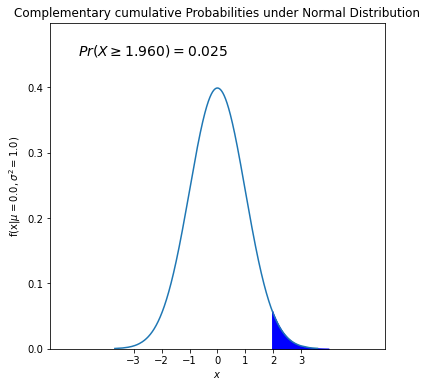

In [17]:
# this code is similar to second code chunk where
# some input arguments are a bit automatized

# define mu, sd and cutoff value (lessthan)

mu = 0
sd = 1
lower_bound = 1.96

#calculate the cumulative probability under given distribution
complementary_prob = 1-stats.norm.cdf(x = lower_bound, loc = mu, scale = sd)

#start off plotting 
fig, ax = plt.subplots(figsize = (6, 6))

# for pdf curve
#generate synthetic data to plot the pdf
x = stats.norm.rvs(loc = mu, scale = sd, size = 10000)
x1 = np.sort(x)

plt.plot(x1, stats.norm.pdf(x1, loc = mu, scale = sd), 
         label = r'$\mu=%.1f,\sigma^2=%.1f$' % (mu, sd*sd))

# arrange x-axis limits based on the min and max values in the data
plt.xlim(int(np.min(x1))-3, int(np.max(x1))+3)
#instead of default tickmarks, define yours.
plt.xticks(np.arange(int(np.min(x1)), int(np.max(x1))+1, 1))
# arrange upper limit of y-axis max values in the pdf values (y's min value is always 0).
plt.ylim(0, np.max(stats.norm.pdf(x1, loc = mu, scale = sd))+0.1)
plt.xlabel('$x$')
plt.ylabel('f(x|$\mu=%.1f,\sigma^2=%.1f$)' % (mu, sd*sd))
plt.title('Complementary cumulative Probabilities under Normal Distribution')
#for shading area defined by the cumulative probability

#specifically generate values between lower_bound and int(np.max(x1)) with increments 0.01
#with np.arange(), data comes alread sorted (it creates an increasing series).
x2 = np.arange(lower_bound,int(np.max(x1))+1,0.01)

#go to https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html for more info
plt.fill_between(x2,stats.norm.pdf(x2, loc = mu, scale = sd), color='blue')
        
#add a text, where x coordinate is -4.5 and y-coordinate is based on the peak point of the curve.

plt.text(int(np.min(x1))-2,np.max(stats.norm.pdf(x1, loc = mu, scale = sd))+0.05,
         "$Pr(X \geq %.3f)=%.3f$" % (lower_bound, complementary_prob), fontsize=14)

plt.show()


Basesd on these functions, we can create a very general function which calculates the probabilities under specified settings and turn it into a widget for a better a user-experience. 